In [1]:
import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 999

In [2]:
df = pd.read_csv('/Users/allen/Documents/Data_512/Data/Call_Data_filtered.csv')

# make YearMonth datetime type
df['YearMonth'] = pd.to_datetime(df['YearMonth'])

# filter priority 9 for this project
df = df[df['Priority'] != 9]

# EDA
### Average response time over time

In [3]:
# regroup priority
df['priority'] = df['Priority'].apply(utils.group_priority)

# aggregate response_time on priority and YearMonth
response_by_priority = df.groupby(['priority','YearMonth'])['response_time'].mean().reset_index()

/anaconda3/envs/env_0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


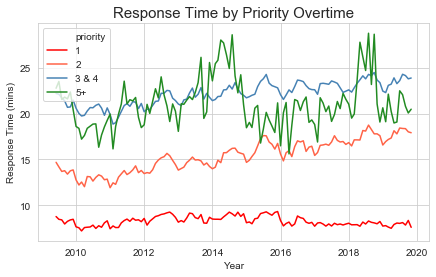

In [4]:
# set themes
colors = ["red", "tomato", "steelblue", "forestgreen"]
palette = sns.color_palette(colors)

# plot response_time by priority overtime
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(7,4))
sns.lineplot(x="YearMonth", y="response_time", hue="priority", palette=palette, data=response_by_priority)
ax.set_xlabel('Year')
ax.set_ylabel('Response Time (mins)')
ax.set_title('Response Time by Priority Overtime', fontsize=15);

### Response time by call type

In [5]:
# aggregate response time by call type
response_by_call_type = df.groupby(['Priority','Call Type']).agg(
    response_time = ('response_time','mean'),
    n = ('response_time','count')
).reset_index().sort_values(['Priority','response_time'])

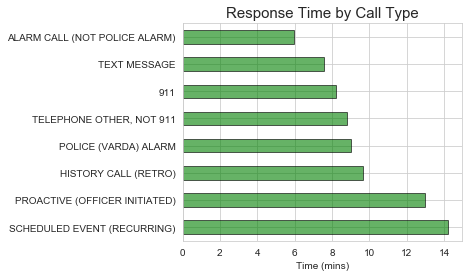

In [6]:
fig, ax = plt.subplots(figsize=(5,4))
response_by_call_type[(response_by_call_type['Priority'] == 1) & 
                      (response_by_call_type['Call Type'] != 'ONVIEW') & 
                      (response_by_call_type['Call Type'] != 'IN PERSON COMPLAINT')][['Call Type','response_time']] \
    .set_index('Call Type') \
    .sort_values('response_time', ascending=False) \
    .plot.barh(edgecolor='black', color='green', legend=False, alpha=0.6, ax=ax)
ax.set_title('Response Time by Call Type', fontsize=15)
ax.set_ylabel('')
ax.set_xlabel('Time (mins)');

### Compare 911 calls to non 911 calls

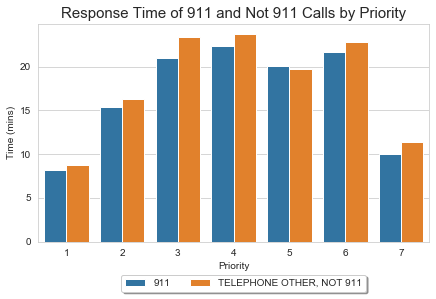

In [7]:
fig, ax = plt.subplots(figsize=(7,4))
sns.barplot(x='Priority', y='response_time', hue='Call Type', 
            data=response_by_call_type[(response_by_call_type['Call Type'] == '911') | 
                                       (response_by_call_type['Call Type'] == 'TELEPHONE OTHER, NOT 911')])
ax.set_ylabel('Time (mins)')
ax.set_title('Response Time of 911 and Not 911 Calls by Priority', fontsize=15)
ax.legend(loc='upper left', bbox_to_anchor=(0.2, -0.13), shadow=True, ncol=2);

### Does SPD response to text messages significantly faster than 911 calls?

In [8]:
from scipy import stats
stats.ttest_ind(df[(df['Priority'] == 1) & (df['Call Type'] == 'TEXT MESSAGE')]['response_time'],
                df[(df['Priority'] == 1) & (df['Call Type'] == '911')]['response_time'],
                equal_var=False)

Ttest_indResult(statistic=-0.9291754436264343, pvalue=0.3566463963383246)

#### p-value is not significant so there is no evidence showing that response time to text messages is statistically significant faster than 911 calls

### Response time by event type

In [9]:
response_by_event_type = df.groupby(['Priority','Initial Call Type']).agg(
    response_time = ('response_time','mean'),
    n = ('response_time','count')
).reset_index().sort_values(['response_time'])

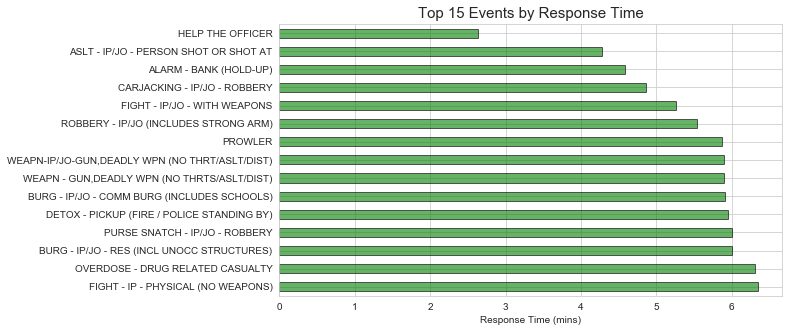

In [10]:
top_n = 15
priority = 1
fig, ax = plt.subplots(figsize=(9,5))
response_by_event_type[(response_by_event_type['Priority'] == priority) & 
                       (response_by_event_type['n'] > 50)].head(top_n) \
    .sort_values('response_time', ascending=False) \
    .plot.barh(x='Initial Call Type', y='response_time', edgecolor='black', color='green', alpha=0.6, legend=False, ax=ax)
ax.set_ylabel('')
ax.set_xlabel('Response Time (mins)')
ax.set_title('Top {} Events by Response Time'.format(top_n), fontsize=15);